# Import relevant modules

In [108]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns

# Import data
Select the data to be imported.

In [75]:
df = pd.read_csv("Sales_DataSet.cvs")

# Data visualization
When studying a new Data Set is important to visualize how the information is laid out. Afterwards clean and reorganize the information for a better analysis.

In [76]:
df.head(20)

,Log,Month,Country,Serial Number,Product_A,Product_B,Product_C,Shipped
0,2022-01-03 09:15:23,2022-01,Spain,SN001,120,85,60,Yes
1,2022-02-07 14:42:10,2022-02,Germany,SN002,135,90,65,Yes
2,2022-03-05 11:08:45,2022-03,France,SN003,150,95,70,Yes
3,2022-04-09 16:27:31,2022-04,Italy,SN004,160,100,75,No
4,2022-05-02 08:55:12,2022-05,Spain,SN005,170,105,80,Yes
5,2022-06-06 13:33:59,2022-06,Germany,SN006,180,110,85,Yes
6,2022-07-04 10:21:17,2022-07,France,SN007,190,115,90,Yes
7,2022-08-08 15:49:03,2022-08,Italy,SN008,200,120,95,No
8,2022-09-03 09:12:44,2022-09,Spain,SN009,210,125,100,Yes
9,2022-10-07 14:38:29,2022-10,Germany,SN010,220,130,105,Yes


# Data cleaning
We drop from our data the information not considered useful for our analysis, rename the fields that may require a better description, reorganize the information, etc.

In [77]:
df.drop(['Log','Serial Number','Shipped'],axis=1,inplace=True)
df.rename(columns={'Country':'Location','Product_A':'Gasoline Cars','Product_B':'Diesel Cars','Product_C':'Electric Cars'},inplace=True)
df.head()

,Month,Location,Gasoline Cars,Diesel Cars,Electric Cars
0,2022-01,Spain,120,85,60
1,2022-02,Germany,135,90,65
2,2022-03,France,150,95,70
3,2022-04,Italy,160,100,75
4,2022-05,Spain,170,105,80


In [78]:
# Transform the Month column into a datetime object
df["Month"] = pd.to_datetime(df["Month"], format="%Y-%m")

# Extract Year and abbreviated Month name
df["Year"] = df["Month"].dt.year
df["Month"] = df["Month"].dt.strftime("%b")

# Reorder columns
cols = df.columns.tolist()
cols.insert(cols.index("Month"), cols.pop(cols.index("Year")))
df = df[cols]

# Preview the result
df.head()

,Year,Month,Location,Gasoline Cars,Diesel Cars,Electric Cars
0,2022,Jan,Spain,120,85,60
1,2022,Feb,Germany,135,90,65
2,2022,Mar,France,150,95,70
3,2022,Apr,Italy,160,100,75
4,2022,May,Spain,170,105,80


### SimpleImputer – Handling Missing Data

`SimpleImputer` from `sklearn.impute` allows us to replace any null (NaN) value in our dataset with a defined value.

- The strategy `'constant'` replaces all nulls with a fixed value.
- If no value is defined:
  - Numeric nulls become `0`
  - Text nulls become `"missing"`

The resulted data is then loaded in a New Data Frame `df2`. We will use this data for our analysis.

In [79]:
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

### Grouping data
The data is grouped in a new Data Frame `df3` to show the sells of every location, year and month of each of the product types.

In [88]:
car_types = ['Gasoline Cars','Diesel Cars','Electric Cars']
df3 = df2.groupby(['Location','Year','Month'])[car_types].sum().reset_index()
df3.head(20)

,Location,Year,Month,Gasoline Cars,Diesel Cars,Electric Cars
0,France,2022,Jul,190,115,90
1,France,2022,Mar,150,95,70
2,France,2022,Nov,230,135,110
3,France,2023,Jul,310,175,150
4,France,2023,Mar,270,155,130
5,France,2023,Nov,350,195,170
6,France,2024,Jul,430,235,210
7,France,2024,Mar,390,215,190
8,Germany,2022,Feb,135,90,65
9,Germany,2022,Jun,180,110,85


For further analysis is convenient to know the specific locations. With the following line the countries are saved in the array `countries`.

In [81]:
countries = df3['Location'].unique()

# Data analysis
The following code plots the information in different graphics to better study the sales in every location.

## Car sales per location, ploted by Year and Month

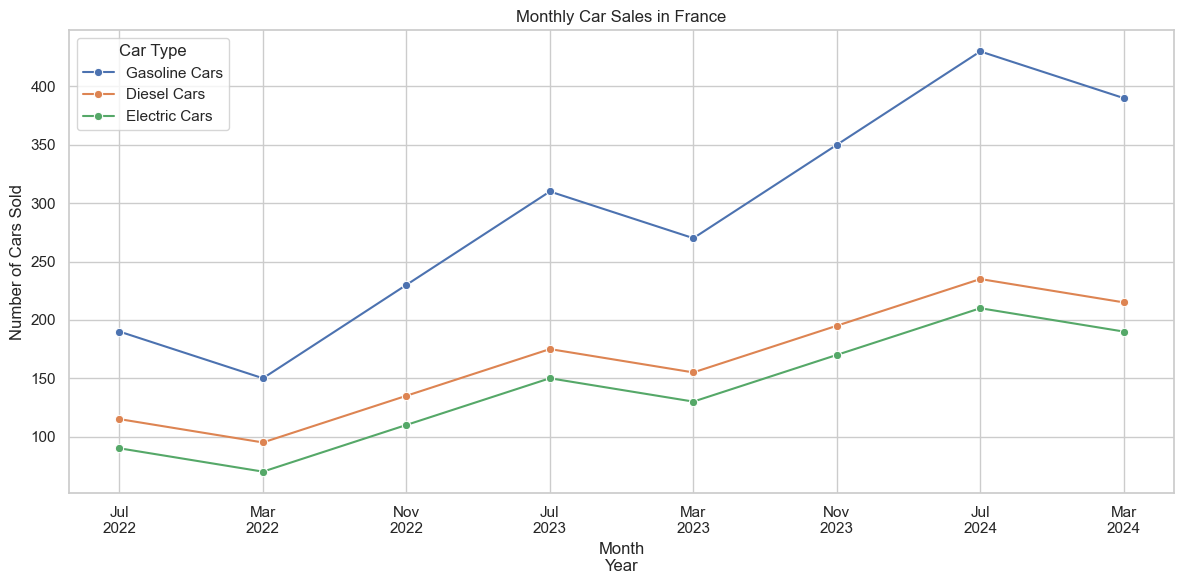

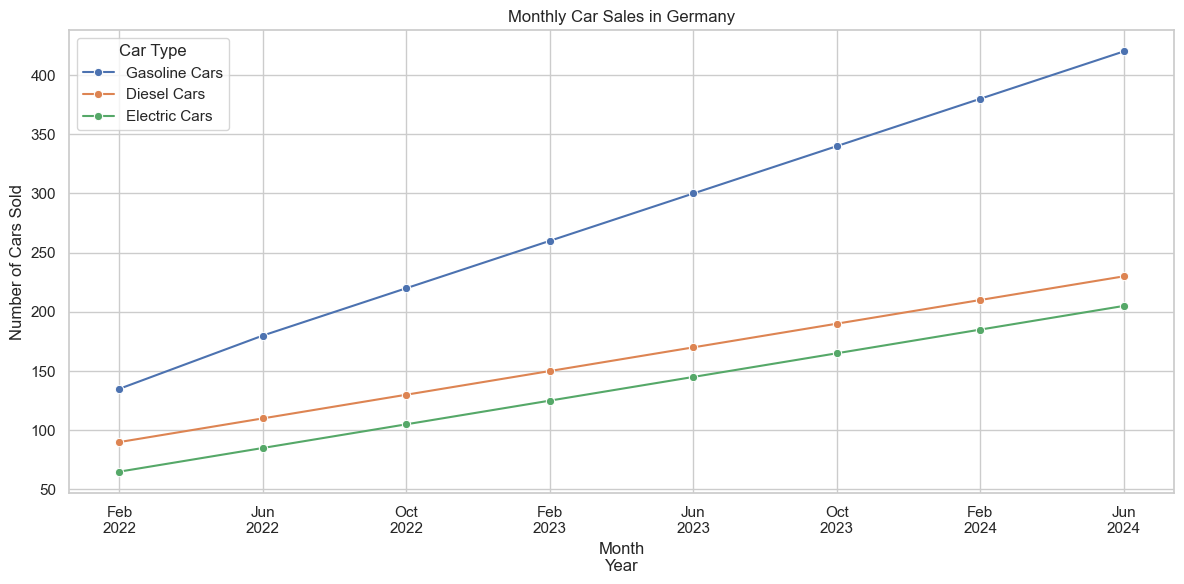

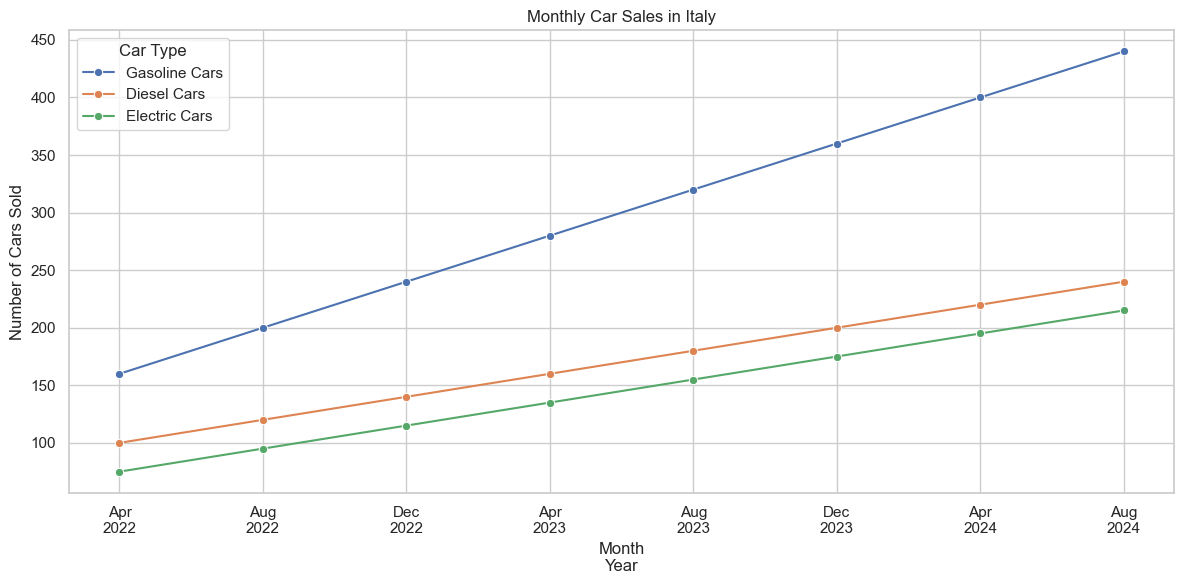

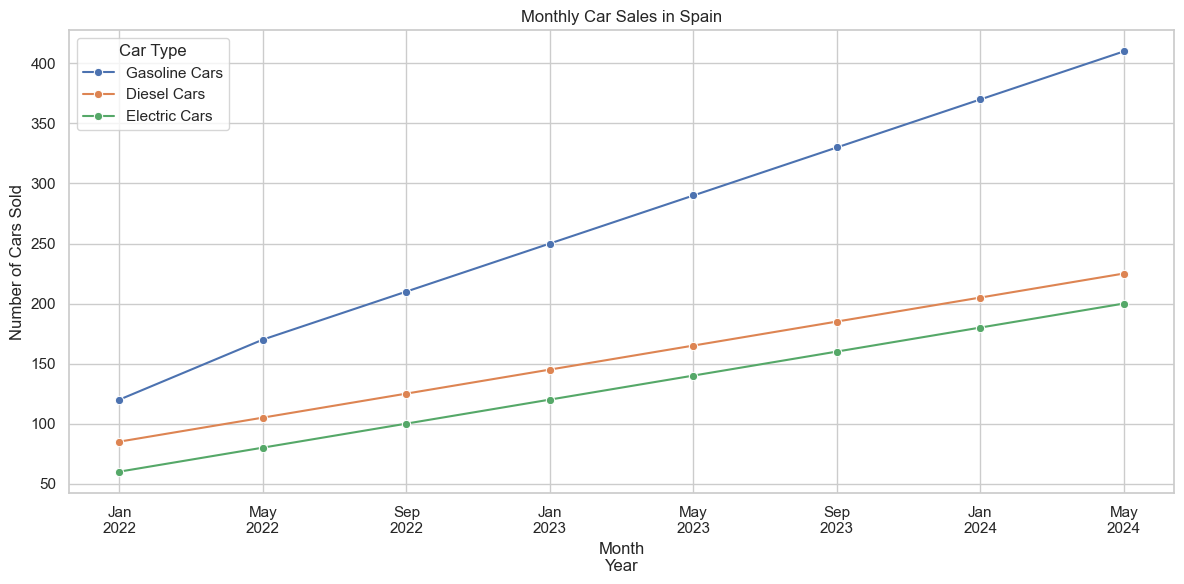

In [96]:
# Create a new column combining Year and Month (abbreviated) and customized label
df3["Date"] = pd.to_datetime(df3["Year"].astype(str) + "-" + df3["Month"], format="%Y-%b")
df3["Date_Label"] = df3["Date"].dt.strftime("%b\n%Y")

# Set plot style
sns.set(style="whitegrid")

for country in countries:
    plt.figure(figsize=(12, 6))
    
    # Filter data for the current country
    country_data = df3[df3["Location"] == country]
    
    # Melt the DataFrame to long format for seaborn
    melted = country_data.melt(
        id_vars=["Date_Label"],
        value_vars=car_types,
        var_name="Car Type",
        value_name="Sales"
    )
    
    # Plot
    sns.lineplot(data=melted, x="Date_Label", y="Sales", hue="Car Type", marker="o")
    
    plt.title(f"Monthly Car Sales in {country}")
    plt.xlabel("Month\nYear")
    plt.ylabel("Number of Cars Sold")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.legend(title="Car Type")
    plt.show()

## Car sales in all location, ploted by Year and Month

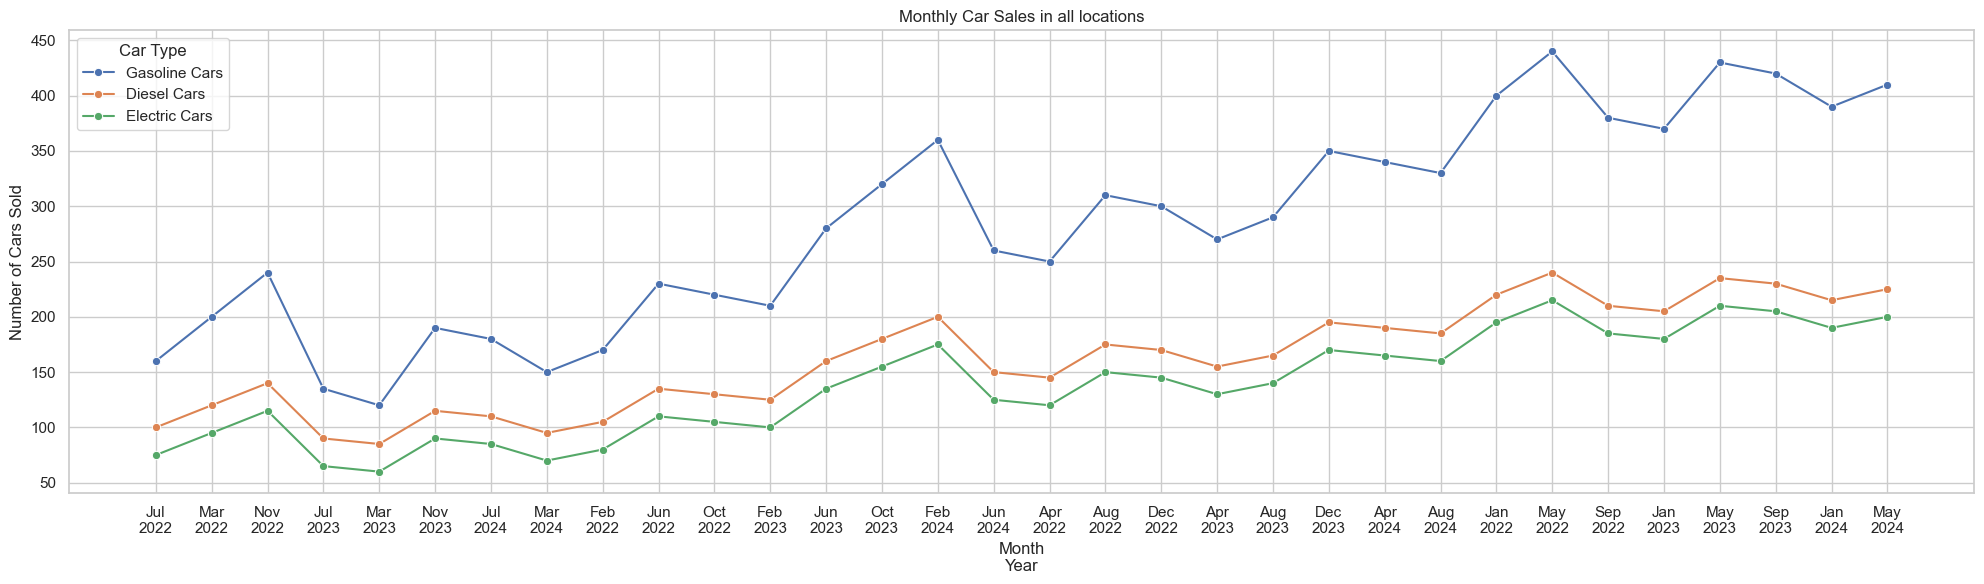

In [93]:
total_sales = df3.groupby(['Year','Month'])[['Gasoline Cars','Diesel Cars','Electric Cars']].sum().reset_index()

# Create a new column combining Year and Month (abbreviated) and customized label
total_sales["Date"] = pd.to_datetime(df3["Year"].astype(str) + "-" + df3["Month"], format="%Y-%b")
total_sales["Date_Label"] = df3["Date"].dt.strftime("%b\n%Y")

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))

# Melt the DataFrame to long format for seaborn
melted = total_sales.melt(
    id_vars=["Date_Label"],
    value_vars=car_types,
    var_name="Car Type",
    value_name="Sales"
)

# Plot
sns.lineplot(data=melted, x="Date_Label", y="Sales", hue="Car Type", marker="o")

plt.title("Monthly Car Sales in all locations")
plt.xlabel("Month\nYear")
plt.ylabel("Number of Cars Sold")
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title="Car Type")
plt.show()